In this notebook, we play around with the moons dataset from sklearn, using PyTorch, inspired by the micrograd notebook (https://github.com/karpathy/micrograd/blob/master/demo.ipynb)

In [41]:
import torch
import sklearn
import tqdm
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

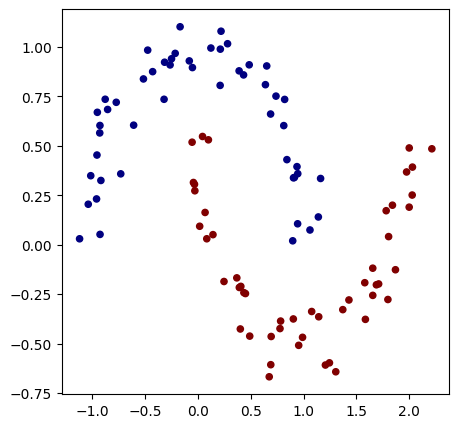

In [14]:
# load dataset
X, y = make_moons(n_samples=100, noise=0.1)
y = y*2 - 1 # make y be -1 or 1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [48]:
# build model using pytorch
# 2-layer fully connected neural net
model = torch.nn.Sequential(
    torch.nn.Linear(2, 16), # input layer to hidden layer
    torch.nn.Tanh(),       # activation function
    torch.nn.Linear(16, 1), # hidden layer to output layer
    torch.nn.Tanh(),       # activation function
)
# print number of parameters from model
print(f"num parameters: {sum([len(i) for i in list(model.parameters())])}")


num parameters: 34


In [53]:
# train, build loss
loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-4

for k in tqdm.tqdm_notebook(range(50000)):
    y_pred = model(torch.tensor(X).float()).squeeze()
    loss = loss_fn(y_pred, torch.tensor(y).float())

    #if k % 10 == 1:
        #print(k, loss.item())
    #print(k, loss.item())

    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

/var/folders/yp/9rxjv3w91p3b3kh1v7prxz600000gn/T/ipykernel_48914/4078939512.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm.tqdm_notebook(range(50000)):


  0%|          | 0/50000 [00:00<?, ?it/s]

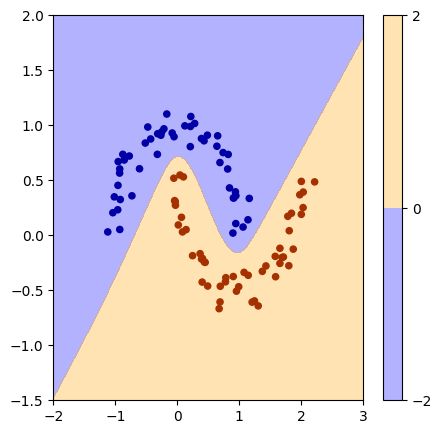

In [54]:
# plot 2-d decision boundary
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
xx, yy = torch.meshgrid(torch.linspace(-2, 3, 100), torch.linspace(-1.5, 2, 100))
grid = torch.cat([xx.unsqueeze(-1), yy.unsqueeze(-1)], dim=-1).float()
with torch.no_grad():
    zz = model(grid).squeeze().numpy()
plt.contourf(xx, yy, zz, levels=0, alpha=0.3, colors=['blue', 'orange'])
plt.colorbar()
plt.show()


In [6]:
# plot